# About the Dataset

This data set is created by __IBM Data Scientists.__

Our Aim is to __Analyse the factors towards Attrition.__

    The dataset includes features like Age, Employee Role, Daily Rate, Job Satisfaction, Years At Company, Years In Current Role etc. 

## Importing all the required packages

In [29]:
import pandas as pd,numpy as np

# Plot related packages
import matplotlib.pyplot as plt,seaborn as sns; sns.set()

# Model Building related packages for Classification (Supervised)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn import preprocessing #For scaling

from sklearn.preprocessing import LabelEncoder # Converting Categorical(text) to Categorical(numerical)


from sklearn import metrics

# import package to avoid warnings 
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
attrition = pd.read_csv("IBM-HR-Employee-Attrition.csv")
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## EDA

In [3]:
attrition.shape  

#The dataset has 1470 samples and 35 features

(1470, 35)

In [4]:
null_sum = attrition.isnull().sum()
null_sum[null_sum!=0]

# There are no null values present in the data

Series([], dtype: int64)

In [5]:


attrition.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


###### By the above description, we can see that mean and median are nearly same for all the features (except MonthlyIncome) and hence the outlier presence is less. Let's check with the box plot !!!

### Outlier checking and treating it

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'DailyRate'),
  Text(2, 0, 'DistanceFromHome'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'EmployeeCount'),
  Text(5, 0, 'EmployeeNumber'),
  Text(6, 0, 'EnvironmentSatisfaction'),
  Text(7, 0, 'HourlyRate'),
  Text(8, 0, 'JobInvolvement'),
  Text(9, 0, 'JobLevel'),
  Text(10, 0, 'JobSatisfaction'),
  Text(11, 0, 'MonthlyIncome'),
  Text(12, 0, 'MonthlyRate'),
  Text(13, 0, 'NumCompaniesWorked'),
  Text(14, 0, 'PercentSalaryHike'),
  Text(15, 0, 'PerformanceRating'),
  Text(16, 0, 'RelationshipSatisfaction'),
  Text(17, 0, 'StandardHours'),
  Text(18, 0, 'StockOptionLevel'),
  Text(19, 0, 'TotalWorkingYears'),
  Text(20, 0, 'TrainingTimesLastYear'),
  Text(21, 0, 'WorkLifeBalance'),
  Text(22, 0, 'YearsAtCompany'),
  Text(23, 0, 'YearsInCurrentRole'),
  Text(24, 0, 'YearsSinceLastPromotion'),
  Text(25, 0, 'YearsWithCurrManager')])

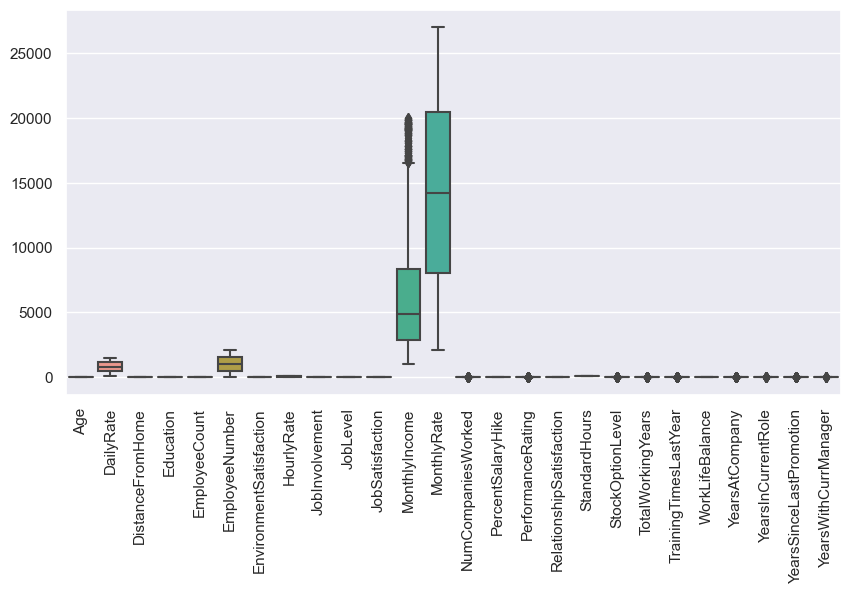

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=attrition)
plt.xticks(rotation=90)

# By looking the box plot, we can see that there are some outliers 
# in the "Monthly Income" Feature as we expected !!!

# Since, the outliers are not so far.. instead of removing the outliers, we can perform capping !!


In [7]:
# Let's find the upper range and lower range for the feature "MonthlyIncome"

Q_3 = attrition.MonthlyIncome.quantile(.75)
Q_1 = attrition.MonthlyIncome.quantile(.25)

IQR = Q_3 - Q_1

upper_range = Q_3 + 1.5 * IQR

lower_range = Q_3 - 1.5 * IQR

print("Upper Range:\t",upper_range)
print("\nLower Range:\t",lower_range)


Upper Range:	 16581.0

Lower Range:	 177.0


In [8]:
attrition.MonthlyIncome[attrition.MonthlyIncome>upper_range].count()

# There are 114 samples has range greater than upper range. We can cap them

114

In [9]:
# Cap the outliers with the use of np.where function

# np.where(condition,new_data,Old_data)

attrition.MonthlyIncome = np.where(attrition.MonthlyIncome>upper_range,
                                                          upper_range,attrition.MonthlyIncome)

In [10]:
attrition.MonthlyIncome[attrition.MonthlyIncome>upper_range].count()

# All the outliers are capped now. Let's check the box plot now

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'DailyRate'),
  Text(2, 0, 'DistanceFromHome'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'EmployeeCount'),
  Text(5, 0, 'EmployeeNumber'),
  Text(6, 0, 'EnvironmentSatisfaction'),
  Text(7, 0, 'HourlyRate'),
  Text(8, 0, 'JobInvolvement'),
  Text(9, 0, 'JobLevel'),
  Text(10, 0, 'JobSatisfaction'),
  Text(11, 0, 'MonthlyIncome'),
  Text(12, 0, 'MonthlyRate'),
  Text(13, 0, 'NumCompaniesWorked'),
  Text(14, 0, 'PercentSalaryHike'),
  Text(15, 0, 'PerformanceRating'),
  Text(16, 0, 'RelationshipSatisfaction'),
  Text(17, 0, 'StandardHours'),
  Text(18, 0, 'StockOptionLevel'),
  Text(19, 0, 'TotalWorkingYears'),
  Text(20, 0, 'TrainingTimesLastYear'),
  Text(21, 0, 'WorkLifeBalance'),
  Text(22, 0, 'YearsAtCompany'),
  Text(23, 0, 'YearsInCurrentRole'),
  Text(24, 0, 'YearsSinceLastPromotion'),
  Text(25, 0, 'YearsWithCurrManager')])

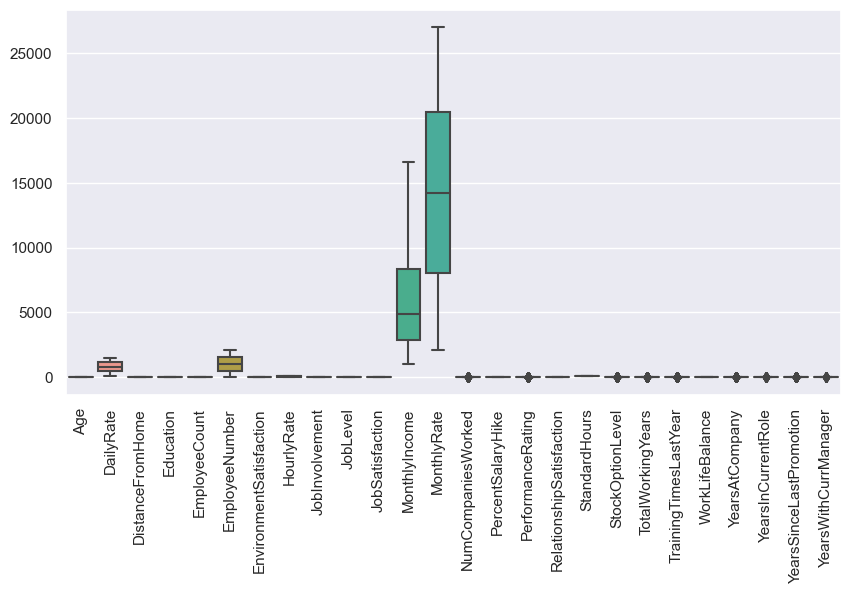

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=attrition)
plt.xticks(rotation=90)

# Now, there is no outliers

### Categorical (text) to Categorical (numerical) conversion

In [12]:
object_columns = list(attrition.select_dtypes(include="object").columns)

len(object_columns)

# So,There are totally 9 features which has categorical data in the form of text.
# We need to convert into numerical data

9

In [13]:
# This loop will give us the view that, if we use label encoder to convert the text to numerical
# data, what texts will be converted into what numbers. (Because when we use label encoder, it
# doesn't show which text converted to which numbers )

replace_values = {}
for i in object_columns:
    k=0
    temp=[]
    ab=list(attrition[i].unique())
    ab.sort()
    for j in ab:
        temp.append((j,k))
        k=k+1
    replace_values[i]=temp

replace_values        

{'Attrition': [('No', 0), ('Yes', 1)],
 'BusinessTravel': [('Non-Travel', 0),
  ('Travel_Frequently', 1),
  ('Travel_Rarely', 2)],
 'Department': [('Human Resources', 0),
  ('Research & Development', 1),
  ('Sales', 2)],
 'EducationField': [('Human Resources', 0),
  ('Life Sciences', 1),
  ('Marketing', 2),
  ('Medical', 3),
  ('Other', 4),
  ('Technical Degree', 5)],
 'Gender': [('Female', 0), ('Male', 1)],
 'JobRole': [('Healthcare Representative', 0),
  ('Human Resources', 1),
  ('Laboratory Technician', 2),
  ('Manager', 3),
  ('Manufacturing Director', 4),
  ('Research Director', 5),
  ('Research Scientist', 6),
  ('Sales Executive', 7),
  ('Sales Representative', 8)],
 'MaritalStatus': [('Divorced', 0), ('Married', 1), ('Single', 2)],
 'Over18': [('Y', 0)],
 'OverTime': [('No', 0), ('Yes', 1)]}

In [14]:
# Let's convert the text features into the numerical features by the use of LabelEncoder

le = LabelEncoder()
df_categorical = attrition.select_dtypes(include=['object'])
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,2,2,1,0,7,2,0,1
1,0,1,1,1,1,6,1,0,0
2,1,2,1,4,1,2,2,0,1
3,0,1,1,1,0,6,1,0,1
4,0,2,1,3,1,2,1,0,0


In [15]:
#Remove the original categorical(text) features and add the numerically converted features

attrition_copy = pd.DataFrame(attrition) # For backup/Reference

for m in df_categorical.columns:
    attrition.drop(m,axis=1,inplace=True)

    
attrition=pd.concat([attrition,df_categorical],axis=1)
attrition.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,2,1,0,7,2,0,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,1,1,0,6,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,3,1,2,1,0,0


### Check the correlation matrix and find the strength

In [16]:
cor_df=pd.DataFrame(attrition.corr()["Attrition"])
cor_df["Absolute_Corr"]=abs(cor_df["Attrition"])
cor_df.sort_values(by="Absolute_Corr",ascending=False)

,Attrition,Absolute_Corr
Attrition,1.000000,1.000000
OverTime,0.246118,0.246118
TotalWorkingYears,-0.171063,0.171063
JobLevel,-0.169105,0.169105
MonthlyIncome,-0.164778,0.164778
MaritalStatus,0.162070,0.162070
YearsInCurrentRole,-0.160545,0.160545
Age,-0.159205,0.159205
YearsWithCurrManager,-0.156199,0.156199
StockOptionLevel,-0.137145,0.137145


<AxesSubplot:>

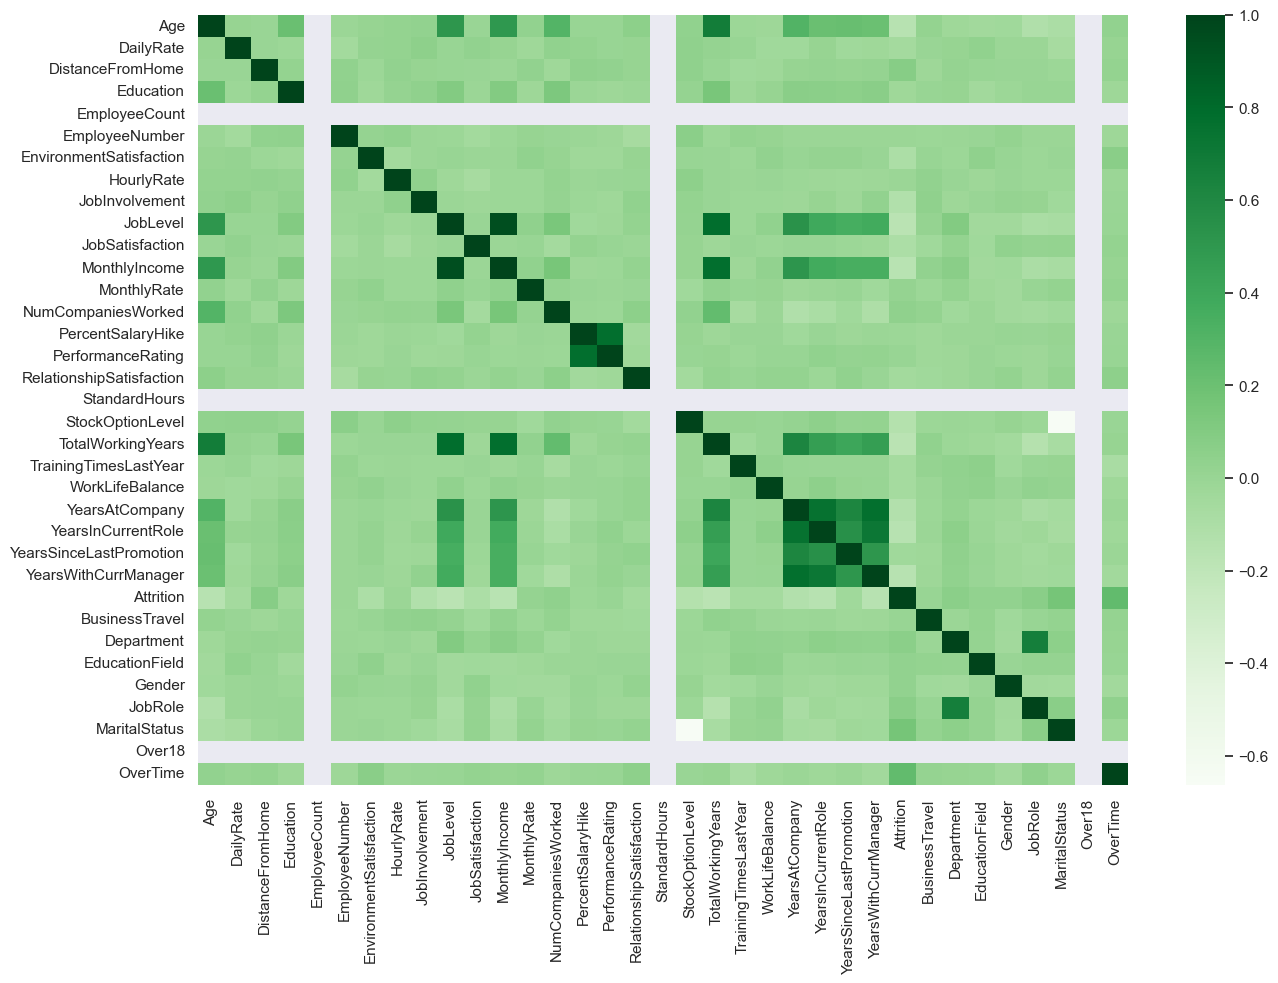

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(attrition.corr(),cmap="Greens")

##### By looking at the matrix, we can see that all the features has less significance towards the target feature

* The Feature "TotalWorkingYears" is highly correlated to "Job Level" (Long years we work, we will get high job level)


* Age is correlated to "JobLevel" and "Education" (As the age increases, our grade and Education level also increases)

In [18]:
# Let's convert the datatype of converted numerical columns to category

for k in df_categorical.columns:
    attrition[k]=attrition[k].astype("category")

attrition.select_dtypes(include="category").columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

#### Let's check the Attrition rate with some features

<AxesSubplot:xlabel='Attrition', ylabel='count'>

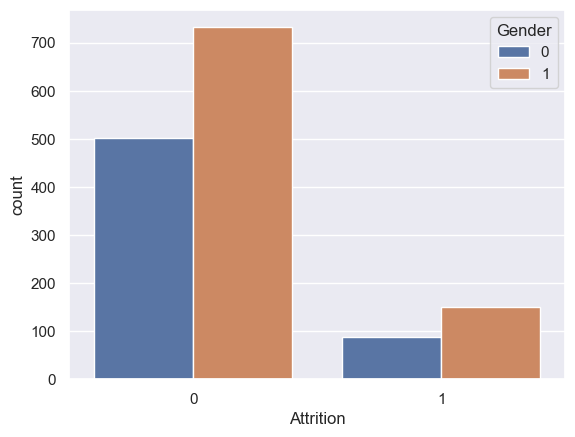

In [19]:
# Attrition vs Gender

sns.countplot(x="Attrition",data=attrition,hue="Gender")

# Gender : 0 - Female ; 1- Male

# Attrition : 0 - No ; 1- Yes

###### By the count plot, we can see the Attrition rate is high for males when compared to females and most of the employees are not changing the company.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

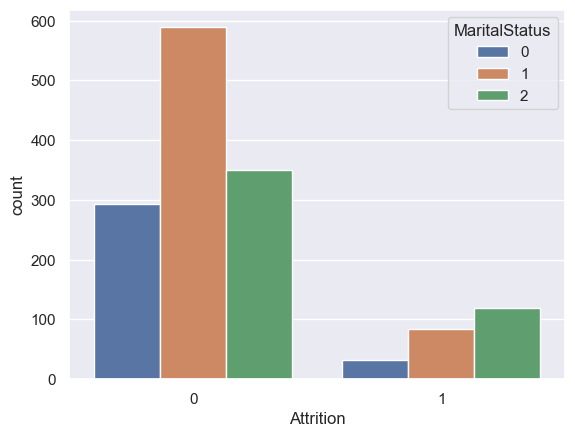

In [20]:
# Attrition vs MaritalStatus
sns.countplot(x="Attrition",data=attrition,hue="MaritalStatus")

# 'MaritalStatus': [('Divorced', 0), ('Married', 1), ('Single', 2)]

# Attrition : 0 - No ; 1- Yes

###### By the above plot, we can infer that Employees who are Single tends to change the company than the others and Married employees tends to stay in the company itself.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

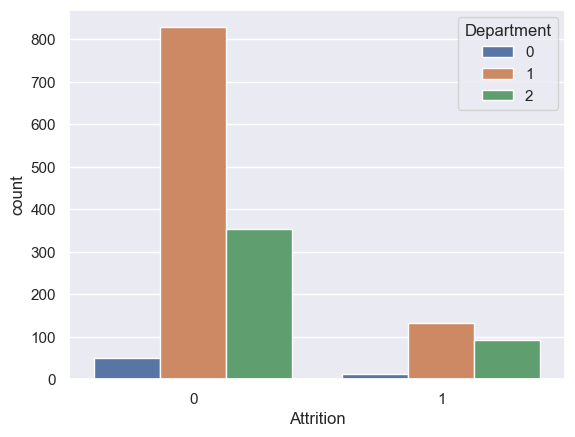

In [21]:
# Attrition vs Department
sns.countplot(x="Attrition",data=attrition,hue="Department")

# 'Department': [('Human Resources', 0),('Research & Development', 1),('Sales', 2)]

# Attrition : 0 - No ; 1- Yes

###### By the above plot, we can infer that  the ratio between Employees in R&D dept not trying to change the company and trying to change the company is Large. So, the probability of Employees from R&D department will try to change the company is very less..

#### Let's separate only the Indpendent features for UNSUPERVISED LEARNING

In [22]:
X = attrition.drop(["EmployeeCount","StandardHours","Over18","EmployeeNumber","Attrition"],axis=1)

Y = attrition["Attrition"]

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)  

### Train and test the models

In [51]:
# Logistic Regression model

log_model = LogisticRegression()  
log_model.fit(X_train, y_train)

log_model_f = log_model.predict(X_test) 
y_log_model_met=metrics.accuracy_score(y_test,log_model_f)

print("Accuracy for y_log_model_met:\n",y_log_model_met)

Accuracy for y_log_model_met:
 0.8458049886621315


In [52]:
# Decision Tree model

tree_model = DecisionTreeClassifier()  
tree_model.fit(X_train, y_train)

tree_model_f = tree_model_us.predict(X_test) 
tree_model_met=metrics.accuracy_score(y_test,tree_model_f)

print("Accuracy for tree_model_met:\n",tree_model_met)

Accuracy for tree_model_met:
 0.7755102040816326


In [53]:
Accuracy_Scores_2=pd.DataFrame([y_log_model_met,tree_model_met,
                                     ],columns=["Accuracy_Scores"]
                               ,index= ["Log_model_met","Tree_model_met",
                                     ])

Accuracy_Scores_2.sort_values(by="Accuracy_Scores",ascending=False)

,Accuracy_Scores
Log_model_met,0.845805
Tree_model_met,0.775510


##### By looking the above dataframe, we can see that Log model performs better than other models in unscaled data..

### Grid Search

In [41]:
param_grid_dt = {
    'max_depth': list(range(1,10)),
    'min_samples_split': list(range(1,10)),
    'min_samples_leaf': list(range(1,10))
}

param_grid_lr = {
    'C': list(range(1,10))
}


In [42]:
grid_search_dt = GridSearchCV(tree_model, param_grid_dt, cv=5, n_jobs=-1)
grid_search_lr = GridSearchCV(log_model, param_grid_lr, cv=5, n_jobs=-1)

In [43]:
grid_search_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [44]:
grid_search_dt.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [45]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [46]:
grid_search_lr.best_params_

{'C': 7}

In [50]:
lr_best = LogisticRegression(C=7)
lr_best.fit(X_train, y_train)

log_model_f1 = lr_best.predict(X_test) 
y_log_model_met1=metrics.accuracy_score(y_test,log_model_f1)

print("Accuracy for y_log_model_met:\n",y_log_model_met1)

Accuracy for y_log_model_met:
 0.8458049886621315


In [49]:
dt_best = DecisionTreeClassifier(max_depth= 1, min_samples_leaf= 1, min_samples_split= 2)  
dt_best.fit(X_train, y_train)

tree_model_f1 = tree_model_us.predict(X_test) 
tree_model_met1=metrics.accuracy_score(y_test,tree_model_f1)

print("Accuracy for tree_model_met:\n",tree_model_met1)

Accuracy for tree_model_met:
 0.7755102040816326


In [55]:
Accuracy_Scores_2=pd.DataFrame([y_log_model_met,tree_model_met,y_log_model_met1,tree_model_met1
                                     ],columns=["Accuracy_Scores"]
                               ,index= ["Log_model_met","Tree_model_met","best_lr","best_dt"
                                     ])

Accuracy_Scores_2.sort_values(by="Accuracy_Scores",ascending=False).T

,Log_model_met,best_lr,Tree_model_met,best_dt
Accuracy_Scores,0.845805,0.845805,0.77551,0.77551


### After Grid search parameters also there is no change in metrics